In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
data.shape

(158, 12)

In [11]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
sns.scatterplot()

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

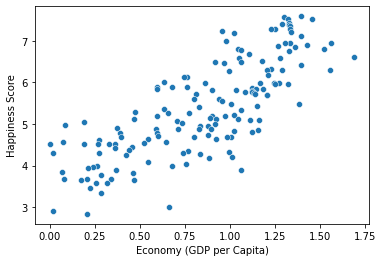

In [15]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=data)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

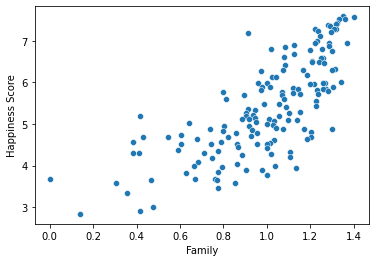

In [16]:
sns.scatterplot(x='Family',y='Happiness Score',data=data)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

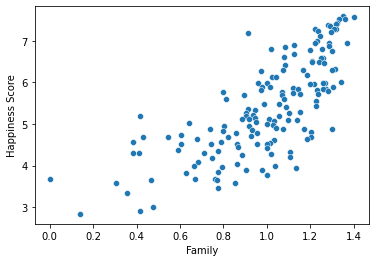

In [17]:
sns.scatterplot(x='Family',y='Happiness Score',data=data)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

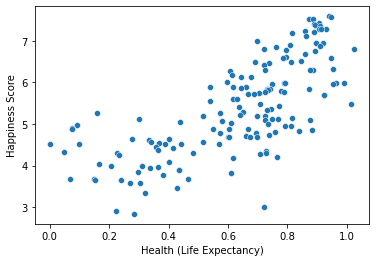

In [18]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=data)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

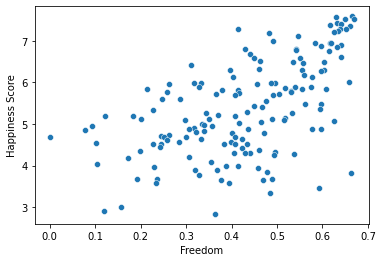

In [19]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=data)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

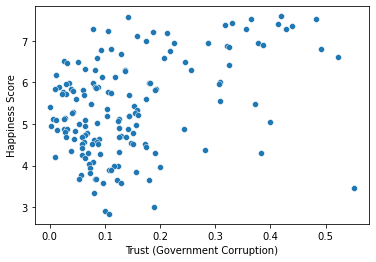

In [20]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=data)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

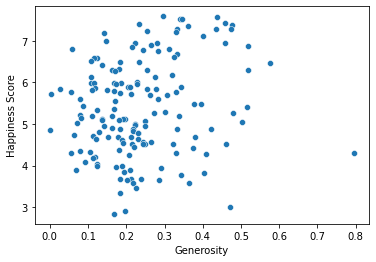

In [22]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=data)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

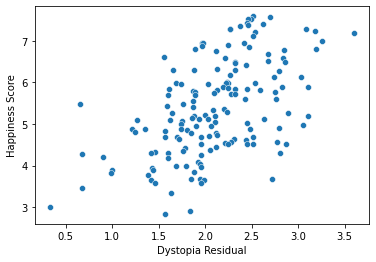

In [23]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=data)

In [24]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [25]:
data.corr()["Happiness Score"].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

In [26]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
data.drop("Country",axis=1,inplace=True)


In [ ]:
data.drop(["Region","Happiness Rank"],axis=1)

In [38]:
data

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


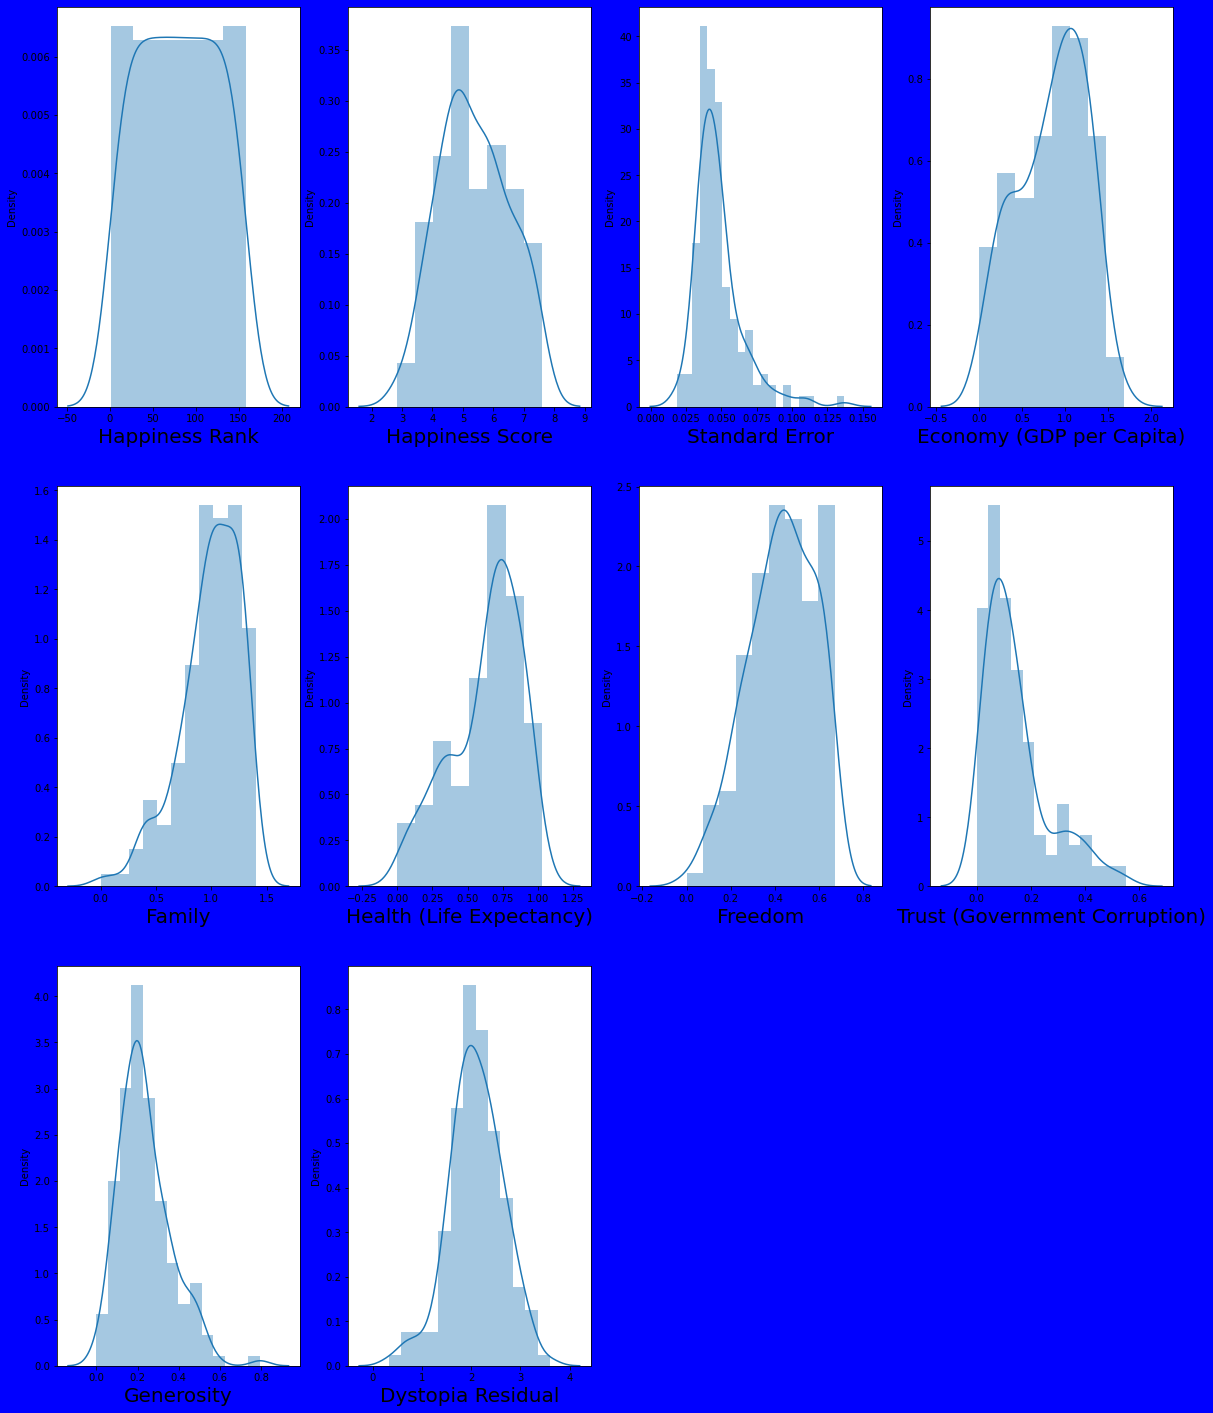

In [110]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1
for column in data:
    if plotnumber<=10 :
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
#plt.tight_layout()
plt.show()

In [40]:
np.abs(zscore(data))

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...
153,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [41]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(158, 10)

In [42]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [43]:
len(np.where(z>3)[0])

9

In [44]:
data_new=data[(z<3).all(axis=1)]

In [45]:
print("new data frame",data_new.shape)

new data frame (149, 10)


In [73]:
#data_new.drop('Happiness Rank',axis=1,inplace=True)
data_new.drop()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [80]:
x=data_new.drop('Happiness Score',axis=1)

In [87]:
y=data_new.iloc[:,0]

In [88]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [89]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [50]:
from sklearn.preprocessing import power_transform

In [90]:
x=power_transform(x,method='yeo-johnson')

In [91]:
x

array([[-0.95033703,  1.49245411,  1.65888016, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 0.37856182,  1.19406711,  2.00912496, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078528, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738878, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044293, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.90641014, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.95033703,  1.49245411,  1.65888016, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 0.37856182,  1.19406711,  2.00912496, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078528, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738878, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044293, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.90641014, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [93]:
x.mean()

0.0

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)
y_train.head()

53     5.855
134    4.194
57     5.824
138    3.989
38     6.295
Name: Happiness Score, dtype: float64

In [95]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [96]:
data.tail()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [99]:
regression.predict(sc.transform([[0.089,.234,.315,.2278,.467,.102,.165,1.234]]))

array([6.39036217])

In [100]:
regression.score(x_train,y_train)

0.9946656819901806

In [101]:
regression.score(x_test,y_test)

0.992595287591962

In [102]:
y_pred=regression.predict(x_test)

In [103]:
y_pred

array([6.09578971, 5.24184935, 5.22070456, 4.22266051, 5.40618243,
       4.96155486, 3.72449849, 6.78023385, 4.6725484 , 7.33231634,
       3.86405456, 5.08805917, 4.36676517, 6.37580097, 6.60987616,
       4.3141055 , 7.10981363, 5.71787089, 4.44633203, 5.86483478,
       5.89139199, 3.21271973, 4.61221915, 6.81634263, 5.26921381,
       5.08639881, 4.88944865, 6.53191823, 4.64652181, 4.02412826,
       4.73263208, 4.93045367, 7.65954444, 5.92756925, 7.31156601,
       4.66345212, 5.08404056, 7.79058129])

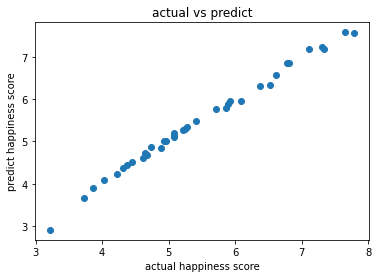

In [104]:
plt.scatter(y_pred,y_test)
plt.xlabel('actual happiness score')
plt.ylabel('predict happiness score')
plt.title('actual vs predict')
plt.show()

# model evaluation

In [105]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [106]:
y_pred=regression.predict(x_test)

In [107]:
mean_absolute_error(y_test,y_pred)

0.07416681778493416

In [108]:
mean_squared_error(y_test,y_pred)

0.009403851924641535

In [109]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0969734598982708